In [1]:
import wrangle as w

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [2]:
df = w.prep_data()

In [3]:
train, val, test = w.train_validate_test(df, 'diabetic')

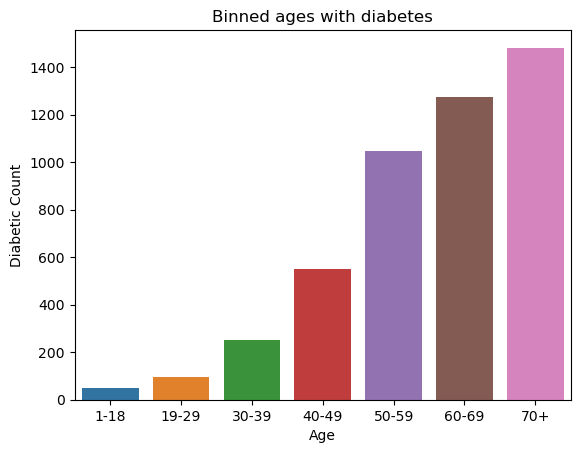

In [4]:
w.get_age_vis(train)

In [5]:
train.shape, val.shape, test.shape

((53321, 11), (22853, 11), (19044, 11))

In [6]:
train[train.blood_glucose_level > 200]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin,bmi_class
37187,Female,55,0,0,former,45.52,6.0,300,1,50-59,6
8662,Female,72,1,0,No Info,27.32,9.0,260,1,70+,3
40852,Female,64,0,0,former,23.80,6.1,300,1,60-69,2
74718,Female,80,0,0,never,24.97,7.5,240,1,70+,2
94965,Male,75,1,1,ever,27.32,7.5,220,1,70+,3
...,...,...,...,...,...,...,...,...,...,...,...
29807,Male,80,0,1,never,24.20,6.8,260,1,70+,2
13030,Female,80,0,1,No Info,30.62,6.6,220,1,70+,4
83222,Female,69,1,0,never,27.32,6.1,240,1,60-69,3
5402,Male,58,0,0,current,27.32,5.7,260,1,50-59,3


# Explore

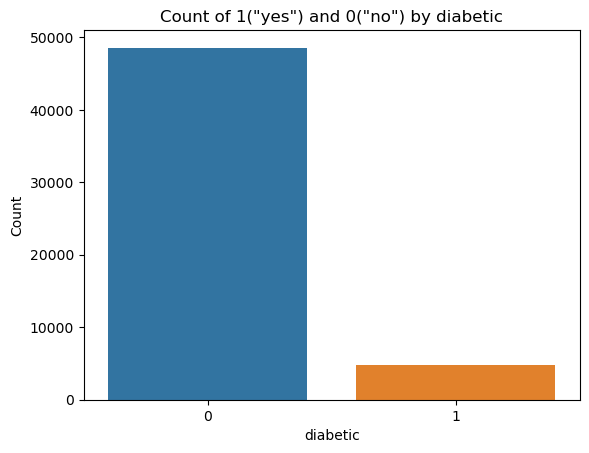

In [7]:

# create a bar plot
sns.countplot(x='diabetic', data=train)

# add axis labels and title
plt.xlabel('diabetic')
plt.ylabel('Count')
plt.title('Count of 1("yes") and 0("no") by diabetic')

# show the plot
plt.show()


In [8]:
train.diabetic.value_counts(normalize=True)

0    0.910917
1    0.089083
Name: diabetic, dtype: float64

In [9]:
val.diabetic.value_counts(normalize=True)

0    0.910909
1    0.089091
Name: diabetic, dtype: float64

In [10]:
test.diabetic.value_counts(normalize=True)

0    0.910943
1    0.089057
Name: diabetic, dtype: float64

- more without diabetes than with

### Distributions of features



In [11]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic', 'age_bin',
       'bmi_class'],
      dtype='object')

In [12]:
train.age.min(), train.age.max()

(1, 80)

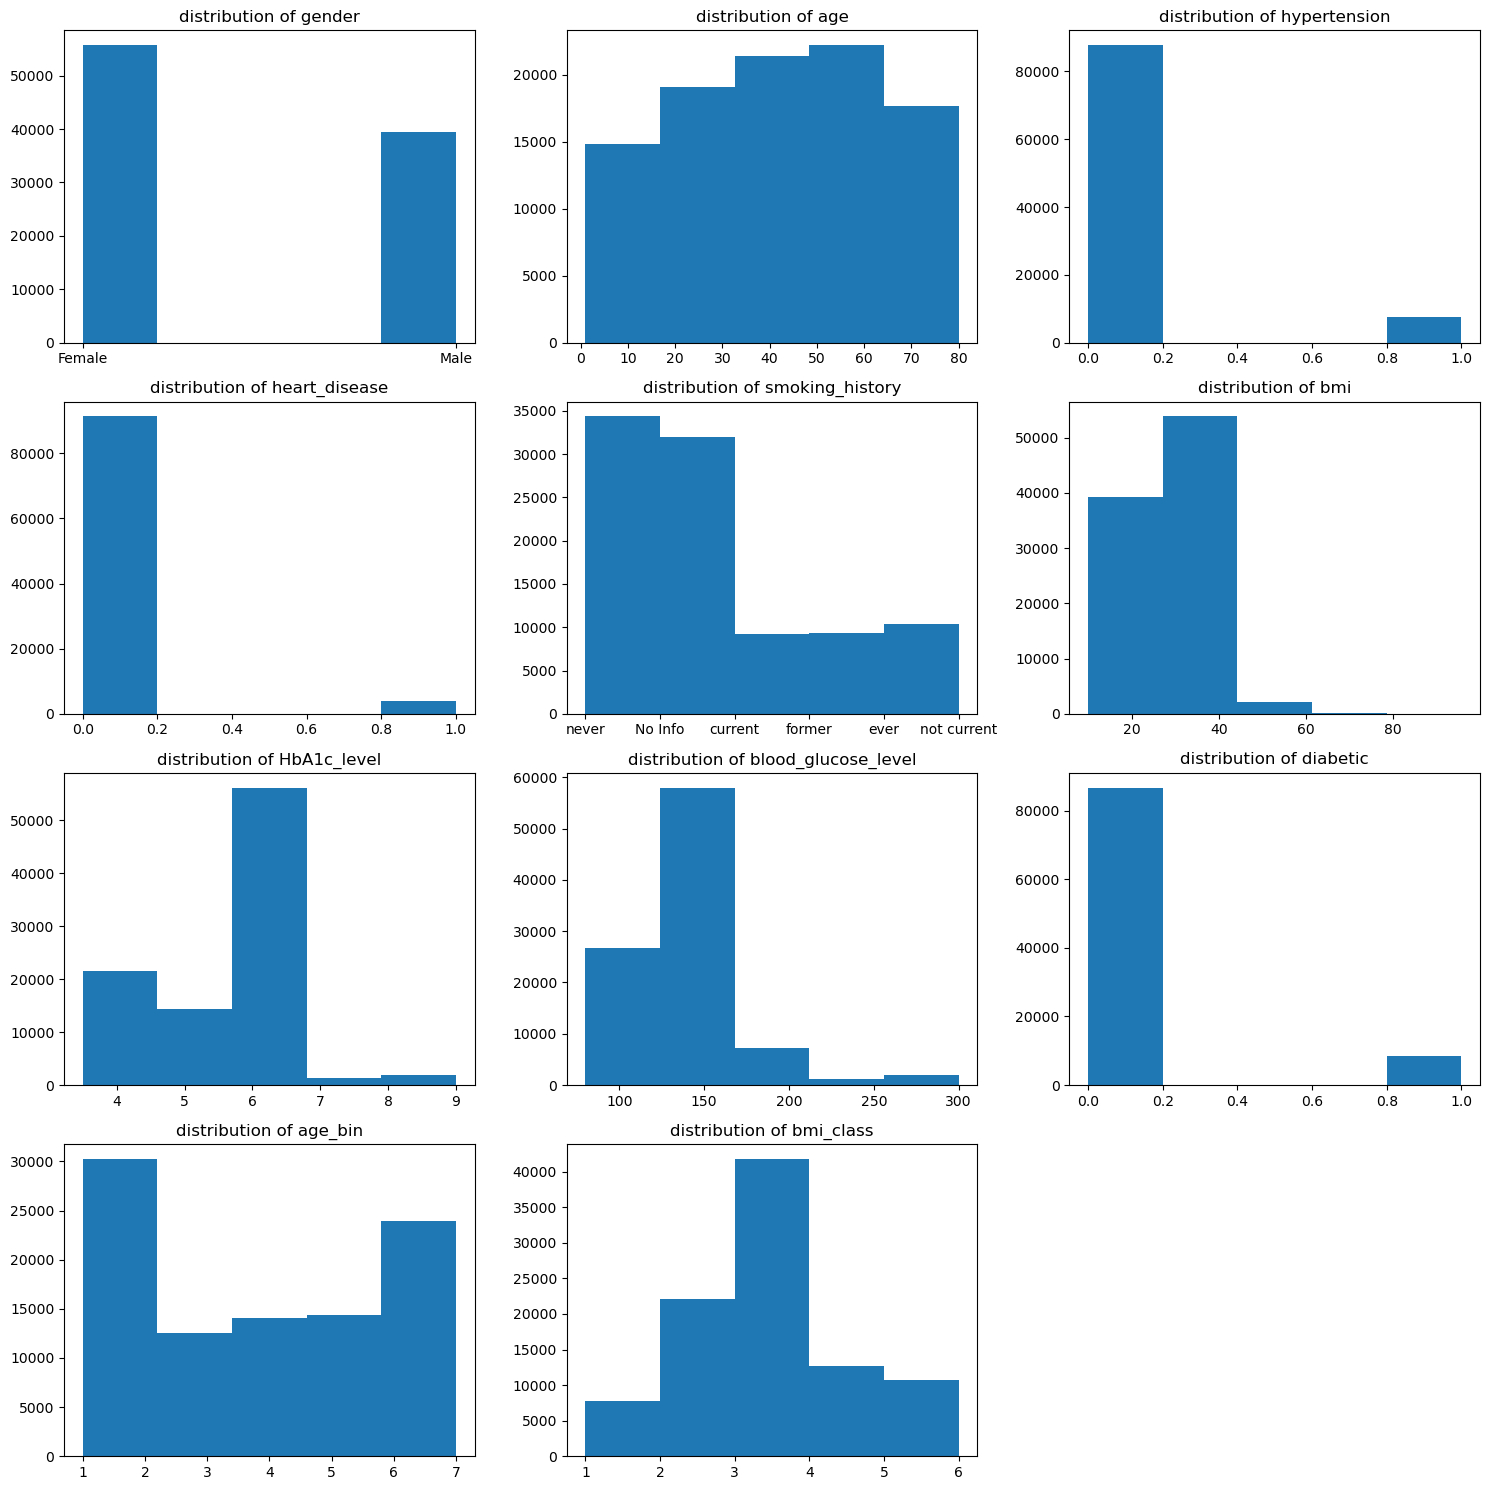

In [13]:


# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and plot a histogram on its corresponding subplot
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=5)
    axes[i].set_title(f'distribution of {col}')

# Remove any unused subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots and display the plots
plt.tight_layout()
plt.show()


In [14]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetic', 'age_bin',
       'bmi_class'],
      dtype='object')

In [15]:
num_cols = ['bmi', 'HbA1c_level', 'blood_glucose_level']
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetic', 'age_bin']

In [16]:
explore_cols = num_cols + cat_cols

Univariate Feature analysis of feature bmi:


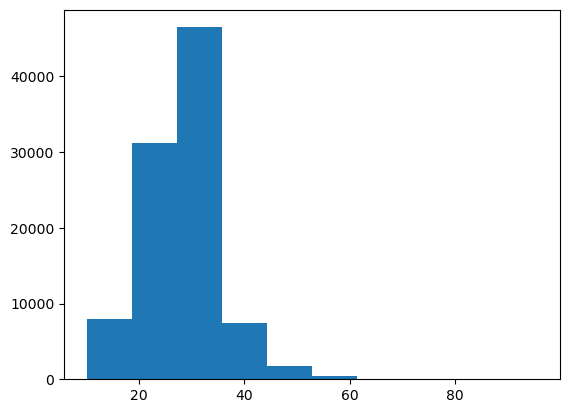

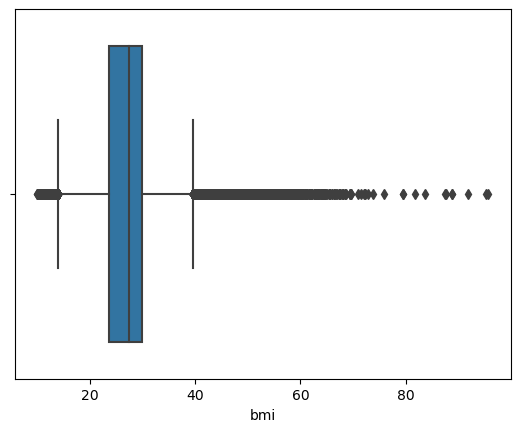

------------------------------
------------------------------
Univariate Feature analysis of feature HbA1c_level:


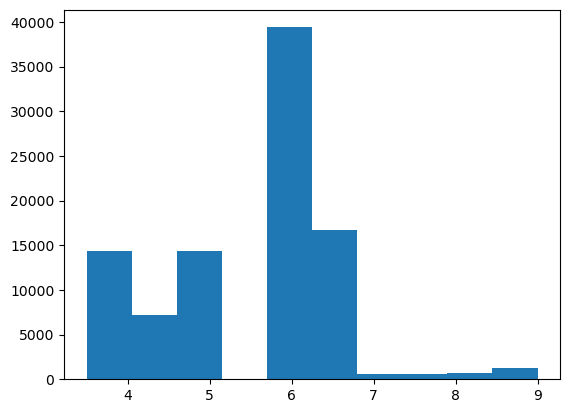

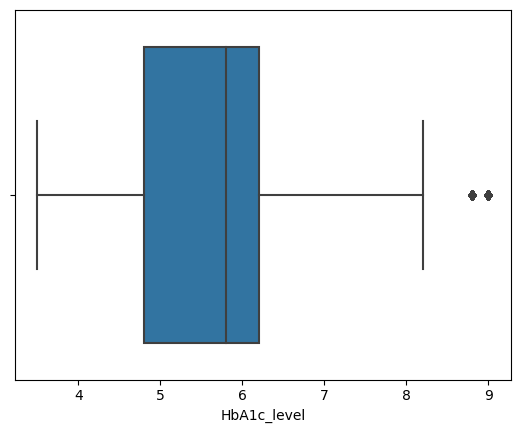

------------------------------
------------------------------
Univariate Feature analysis of feature blood_glucose_level:


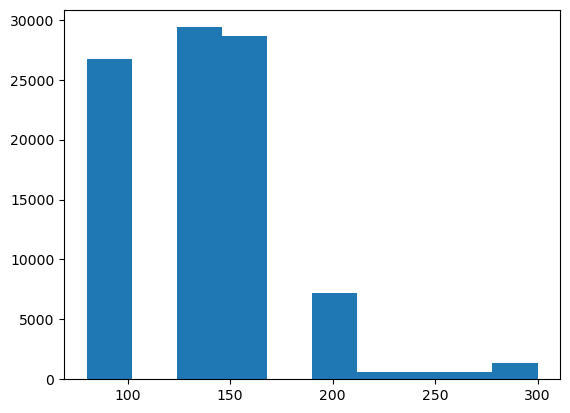

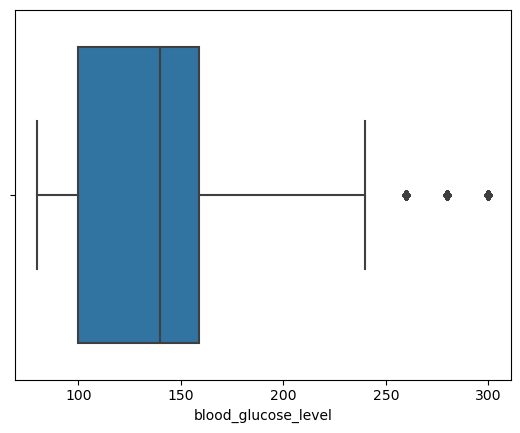

------------------------------
------------------------------
Univariate assessment of feature gender:


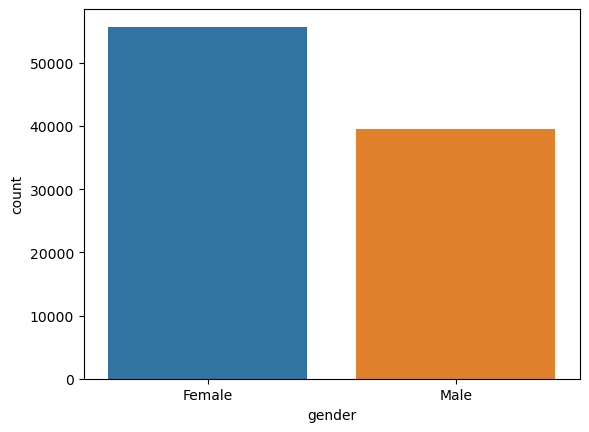

        gender    gender
Female   55728  0.585267
Male     39490  0.414733
------------------------------
------------------------------
Univariate assessment of feature hypertension:


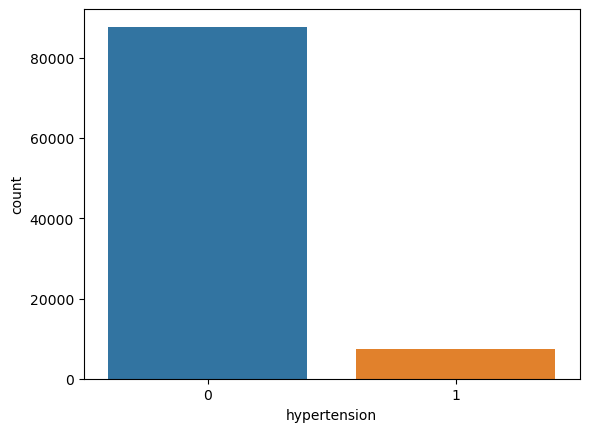

   hypertension  hypertension
0         87757      0.921643
1          7461      0.078357
------------------------------
------------------------------
Univariate assessment of feature heart_disease:


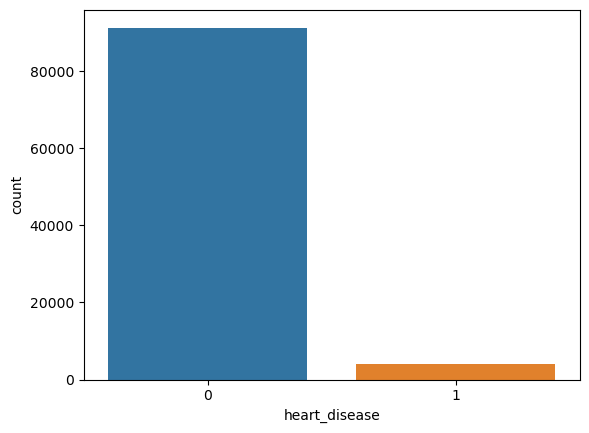

   heart_disease  heart_disease
0          91295         0.9588
1           3923         0.0412
------------------------------
------------------------------
Univariate assessment of feature smoking_history:


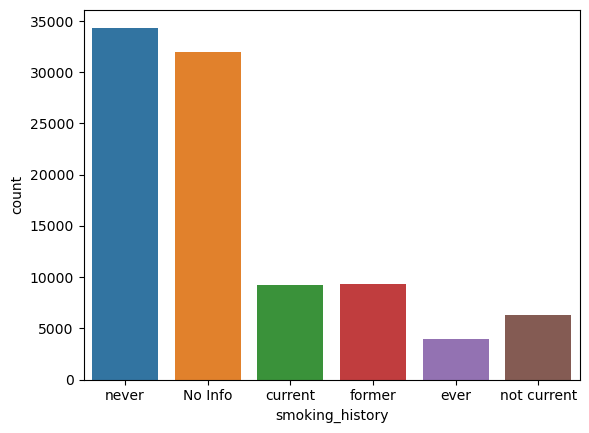

             smoking_history  smoking_history
never                  34358         0.360835
No Info                32018         0.336260
former                  9299         0.097660
current                 9196         0.096578
not current             6350         0.066689
ever                    3997         0.041977
------------------------------
------------------------------
Univariate assessment of feature diabetic:


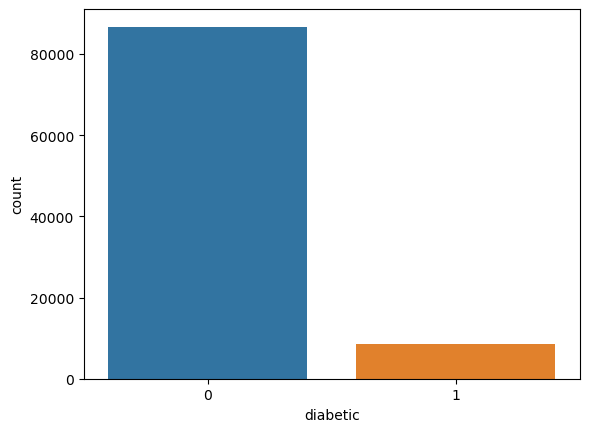

   diabetic  diabetic
0     86736   0.91092
1      8482   0.08908
------------------------------
------------------------------
Univariate assessment of feature age_bin:


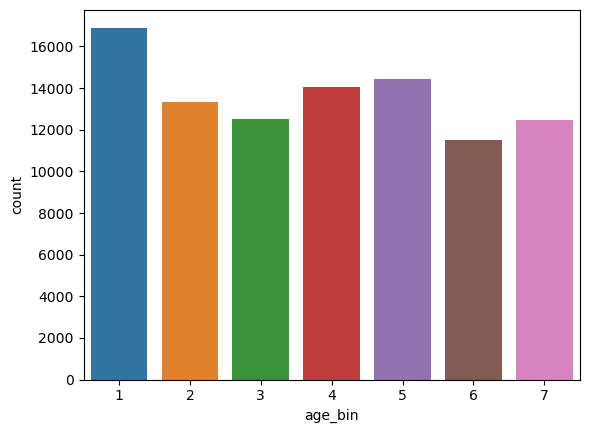

   age_bin   age_bin
1    16905  0.177540
5    14412  0.151358
4    14058  0.147640
2    13348  0.140184
3    12520  0.131488
7    12460  0.130858
6    11515  0.120933
------------------------------
------------------------------


In [17]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=df, x=col)
        plt.show()
        print(
            pd.concat([df[col].value_counts(),
            df[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(df[col])
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
        df[col].describe()
    print('------------------------------')
    print('------------------------------')

In [18]:
df[df.gender == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetic,age_bin,bmi_class


## Does age play a role in diabetes?

#### H$o$: There is no role that age playes in diabetes
#### H$a$: Age does play a role in diabetes

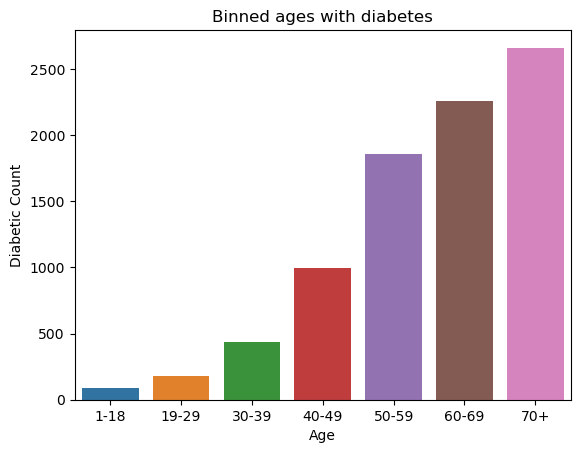

In [19]:
bins = [0, 18, 29, 39, 49, 59, 69, 80]
labels = ['1-18', '19-29', '30-39', '40-49', '50-59', '60-69', "70+"]
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels)

# count the number of occurrences of each bin
diabetic_count = df[df['diabetic'] == 1].groupby('age_bin')['diabetic'].count()

# create a bar plot
sns.barplot(x=diabetic_count.index, y=diabetic_count)

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Binned ages with diabetes')

# show the plot
plt.show()


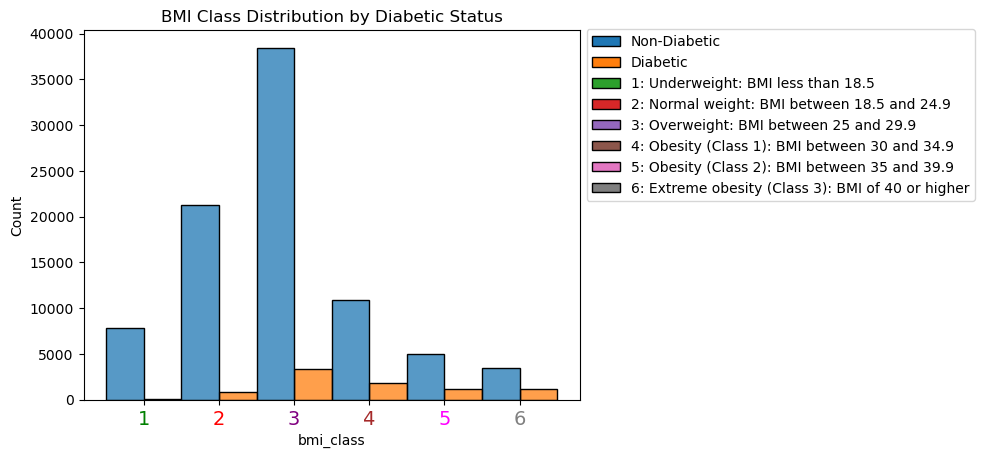

In [21]:
bmi_class_legend = [
        '1: Underweight: BMI less than 18.5',
        '2: Normal weight: BMI between 18.5 and 24.9',
        '3: Overweight: BMI between 25 and 29.9',
        '4: Obesity (Class 1): BMI between 30 and 34.9',
        '5: Obesity (Class 2): BMI between 35 and 39.9',
        '6: Extreme obesity (Class 3): BMI of 40 or higher'
    ]

# Create the histogram with dodge grouping by diabetic status
ax = sns.histplot(data=df, x='bmi_class', hue='diabetic', multiple='dodge')
ax.tick_params(axis='x',labelsize=14)
# Create custom legend handles and labels
handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in sns.color_palette()]

# handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in sns.color_palette()]
legend_labels = ['Non-Diabetic', 'Diabetic'] + bmi_class_legend

# Set the legend with custom handles and labels
plt.legend(handles=handles, labels=legend_labels, bbox_to_anchor=(1, 1.021), ncol=1)
ax.get_xticklabels()[1].set_color("green")
ax.get_xticklabels()[2].set_color("red")
ax.get_xticklabels()[3].set_color("purple")
ax.get_xticklabels()[4].set_color("brown")
ax.get_xticklabels()[5].set_color("magenta")
ax.get_xticklabels()[6].set_color("grey")
# Set the plot title and display the plot
plt.title('BMI Class Distribution by Diabetic Status')
plt.show()


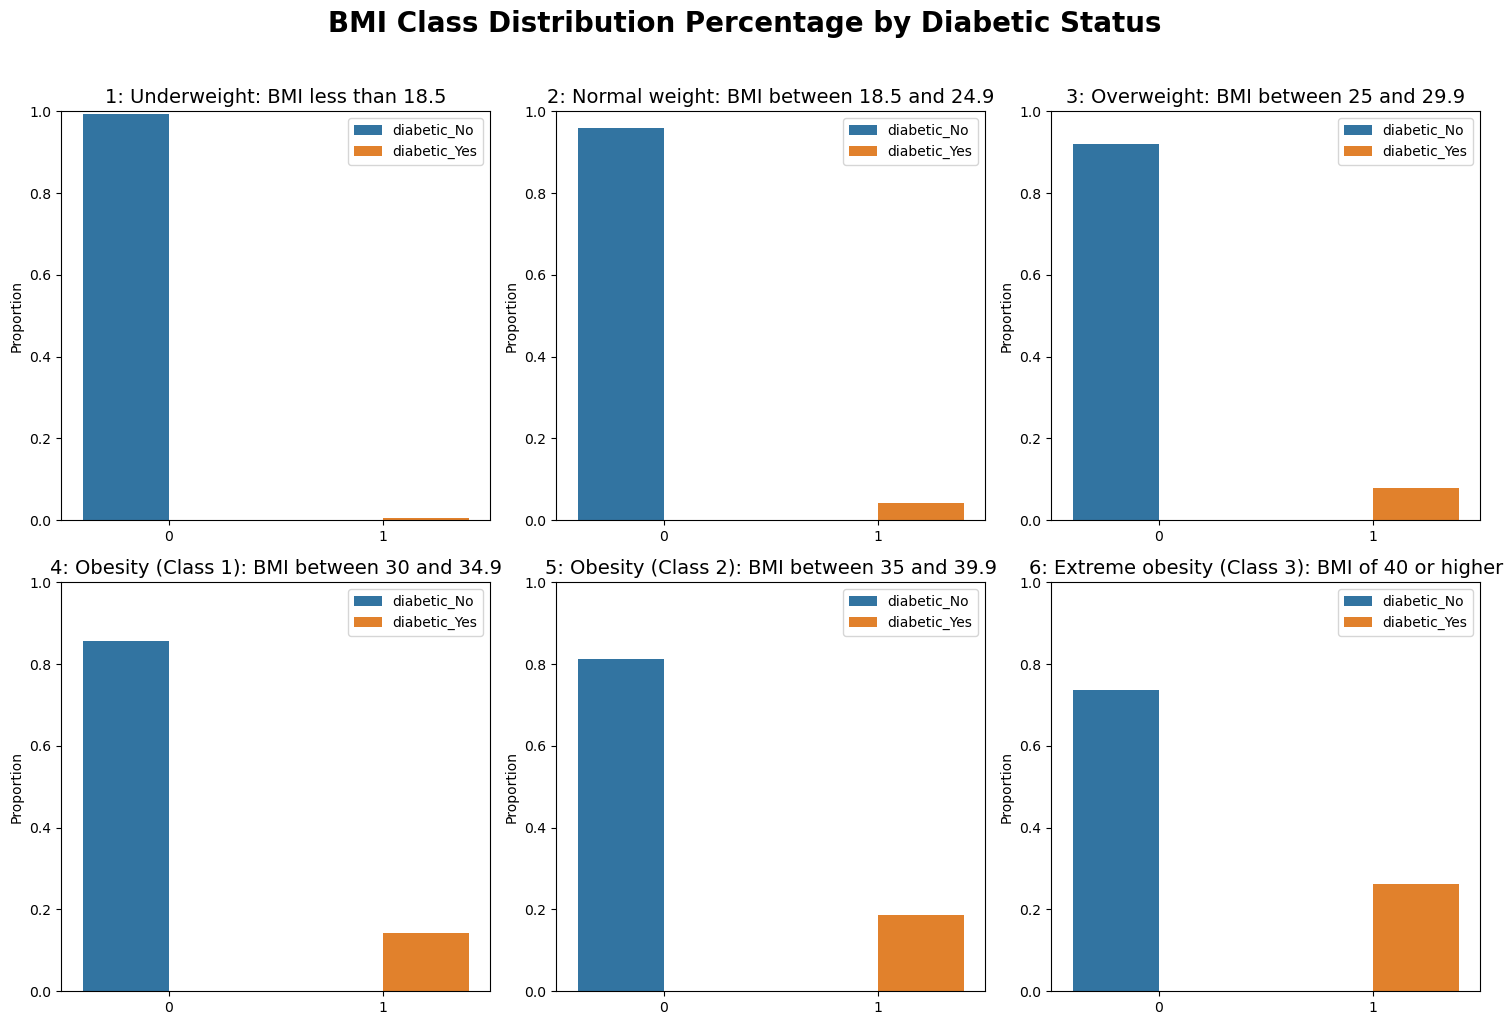

In [86]:
# Define the BMI class order
bmi_class_order = [
    1, 2, 3, 4, 5, 6
]

titles = [ '1: Underweight: BMI less than 18.5',
        '2: Normal weight: BMI between 18.5 and 24.9',
        '3: Overweight: BMI between 25 and 29.9',
        '4: Obesity (Class 1): BMI between 30 and 34.9',
        '5: Obesity (Class 2): BMI between 35 and 39.9',
        '6: Extreme obesity (Class 3): BMI of 40 or higher']

# Define the diabetic status order
diabetic_order = [0, 1]
diabetic_title = ['diabetic_No', 'diabetic_Yes']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('BMI Class Distribution Percentage by Diabetic Status', fontsize=20, fontweight='bold', y=1.02)

# Loop through each BMI class and create a barplot in the corresponding subplot
for i, bmi_class in enumerate(bmi_class_order):
    # Determine the row and column index for the current subplot
    row = i // 3
    col = i % 3
    
    # Subset the data to only include the current BMI class
    data_subset = train[train['bmi_class'] == bmi_class]
    
    # Calculate the counts of diabetic status for the current BMI class
    counts = data_subset['diabetic'].value_counts(normalize=True)
    
    # Create a barplot in the current subplot
    ax = sns.barplot(x=counts.index, y=counts.values, ax=axes[row, col], hue=diabetic_title)
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
   

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


In [65]:
counts

0    0.737495
1    0.262505
Name: diabetic, dtype: float64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53321 entries, 7299 to 35982
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               53321 non-null  object  
 1   age                  53321 non-null  int64   
 2   hypertension         53321 non-null  int64   
 3   heart_disease        53321 non-null  int64   
 4   smoking_history      53321 non-null  object  
 5   bmi                  53321 non-null  float64 
 6   HbA1c_level          53321 non-null  float64 
 7   blood_glucose_level  53321 non-null  int64   
 8   diabetic             53321 non-null  int64   
 9   age_bin              53321 non-null  category
 10  bmi_class            53321 non-null  category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 4.2+ MB


In [ ]:
non_diabetic_count = df[df['diabetic'] == 0].groupby('age_bin')['diabetic'].count()

# create a bar plot
sns.barplot(x=non_diabetic_count.index, y=non_diabetic_count)

# add axis labels and title
plt.xlabel('Age')
plt.ylabel('Diabetic Count')
plt.title('Binned ages with diabetes')

# show the plot
plt.show()


- would seem that age and diabetes do have a positive correleation 
- I wonder if I'm looking at more type 2 diabetes 
- Will do a chisquared test on age binned and diabetics
- Alpha is 0.05

In [ ]:
train[train.age_bin == '70+' ].age.min()

In [ ]:
train[train.age_bin == '70+' ].age.max()

In [ ]:
observed = pd.crosstab(train['age_bin'], train['diabetic'], margins=True)

In [ ]:
observed

In [ ]:
a = 0.05

In [ ]:
chi2, p, _, hypothetical = stats.chi2_contingency(observed)

In [ ]:
chi2, p

In [ ]:
if p < a:
    print(f'We can reject our null hypothesis: {p} < {a}')
else:
    print('We have failed to reject our null hypothesis')

## How is A1C affecting the target?

In [ ]:
train[train.diabetic == 0].HbA1c_level.mean()

In [ ]:
diabetic_A1c = train[train.diabetic == 1].HbA1c_level

In [ ]:
overall_A1c_mean = train.HbA1c_level.mean()

In [ ]:
sns.boxplot(y=train.HbA1c_level, x=train.diabetic)
plt.show()

In [ ]:
sns.barplot(x=train.HbA1c_level, y=train.diabetic)
plt.show()

- diabetics have a higher a1c than non diabetics
- 6.5 to 7.5 range for those who are and a meadian at about 6.7
- 4.8 to 6.2 for those how aren't  and a meadian at about 5.8
- average for diabetic is 6.9
- average for non diabetic is 5.4

#### H$o$: Higher A1c does not a sign of diabetes
#### H$a$: Having a higher A1c is a sign of diabetes

In [ ]:
test_results = stats.ttest_1samp(diabetic_A1c, overall_A1c_mean)
test_results


We can reject the null hypothesis with a p of 0.00

### Does Gender play a role in diabetes

In [ ]:
# count the number of occurrences of each bin
diabetic_count = df[df['diabetic'] == 1].groupby('gender')['diabetic'].count()

# create a bar plot
sns.barplot(x=diabetic_count.index, y=diabetic_count)

# add axis labels and title
plt.xlabel('Gender')
plt.ylabel('Diabetic Count')
plt.title('Gender with diabetes')

# show the plot
plt.show()

- not sure if there is enough of a signicant difference 
- may come back to this one

### Is BMI a significant indicator of diabetes?

In [ ]:
df.head()

In [ ]:
df.bmi.min()

In [ ]:
df.bmi.max()

In [ ]:
sns.scatterplot(data=df, x='bmi', y='age', hue='diabetic')

In [ ]:
sns.boxplot(y=df.bmi, x=df.diabetic)
plt.show()

In [ ]:
bmi_labels = [1, 2, 3, 4, 5, 6]
bmi_bins= [0, 18.5, 25, 30, 35, 40, 100]

- 1 underweight
- 2 normal
- 3 overweight
- 4 obesity class1
- 5 obesity class2
- 6 extreme obesity 

In [ ]:
df['bmi_class'] = pd.cut(df.bmi, bins=bmi_bins, labels=bmi_labels)

In [ ]:
round(df.bmi_class.value_counts(normalize=True), 2)

In [ ]:
df[df.diabetic == 1].bmi.std()


In [ ]:
df[df.diabetic == 0].bmi.std()

In [ ]:
sns.histplot(data=df, x='bmi_class', hue='diabetic', multiple='dodge')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the BMI categories
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obesity (Class 1)', 'Obesity (Class 2)', 'Extreme obesity (Class 3)']

# Define the BMI class definitions for the legend
bmi_class_legend = [
    '1: Underweight: BMI less than 18.5',
    '2: Normal weight: BMI between 18.5 and 24.9',
    '3: Overweight: BMI between 25 and 29.9',
    '4: Obesity (Class 1): BMI between 30 and 34.9',
    '5: Obesity (Class 2): BMI between 35 and 39.9',
    '6: Extreme obesity (Class 3): BMI of 40 or higher'
]
# Create the histogram with dodge grouping by diabetic status
ax = sns.histplot(data=train, x='bmi_class', hue='diabetic', multiple='dodge')

# Set the x-axis tick labels to the BMI category names
handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in sns.color_palette()]


# Create custom legend handles and labels
# handles = [plt.Rectangle((0,0),1,1, color=c, ec="k") for c in sns.color_palette()]
legend_labels = ['Non-Diabetic', 'Diabetic'] + bmi_class_legend

# Set the legend with custom handles and labels
ax.tick_params(axis='x',labelsize=14)
plt.legend(handles=handles, labels=legend_labels, bbox_to_anchor=(1, 1.021), ncol=1)
ax.get_xticklabels()[1].set_color("green")
ax.get_xticklabels()[2].set_color("red")
ax.get_xticklabels()[3].set_color("purple")
ax.get_xticklabels()[4].set_color("brown")
ax.get_xticklabels()[5].set_color("magenta")
ax.get_xticklabels()[6].set_color("grey")
# Set the plot title and display the plot
plt.title('BMI Class Distribution by Diabetic Status')
plt.show()


In [ ]:
bmi_diabetic_values = df[df.diabetic == 1].bmi
bmi_non_diabetic_values = df[df.diabetic == 0].bmi

In [ ]:
t , p = stats.ttest_ind(bmi_diabetic_values, bmi_non_diabetic_values)

In [ ]:
t, p

- Lots of outliers on either side
- the medians for both sit pretty close to each other
- might not be significant enough either

### Is hypertension a potential sign of diabetes

In [ ]:

counts = df.groupby('hypertension')['diabetic'].value_counts().unstack()


sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count of Diabetic Patients')
plt.show()


- more without hypertension have diabetes then do
- might not be a good feature to use

In [ ]:
df.columns

### Is heart disease a significat indicator of diabetes?

In [ ]:
counts = df.groupby('heart_disease')['diabetic'].value_counts().unstack()


sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count of Diabetic Patients')
plt.show()

- same as hypertension
- not a good feature to use

### How about Blood glucose level? 

- Hesitant to use this because without knowing what time these levels were taken could make this column irrelivant 
- Are these number from  a final measure of a glucose tolerance test or just random times?
-  *Data Card does not explicitly say 

In [ ]:
sns.scatterplot(x=df.blood_glucose_level, y=df.HbA1c_level, hue=df.diabetic)
plt.show()

In [ ]:
df.columns

### Finally what about smoking history?

In [ ]:
counts = df.groupby('smoking_history')['diabetic'].value_counts().unstack()

In [ ]:
sns.barplot(x=counts.index, y=counts[1])
plt.xlabel('Smoking History')
plt.ylabel('Count of Diabetic Patients')
plt.show()

In [ ]:
df[(df.diabetic == 1) & (df.blood_glucose_level == 200)]